![title](fd_pollution_band.jpeg)

# Can you predict CO2 emissions from cars of the following brands in 2014: AUDI, Citroen, Kia, Subaru, Smart, Mini (based on the other brands)
- This should be done using data from 2014 only (don't base your model on past data)
- You should neither use 'conso_mixte', 'conso_urb', 'conso_exurb', as it almost perfectly predicts the Co2 emissions (the project would not be challenging)


[Link to download data](https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/)

## Standard methodology
- Understand the problem and analyse the information at your disposal
- Loading data
- Overview, descriptive statistics (might require to clean data before)
- Data management:
    - NA imputation
    - Feature selection
    - Feature engineering
        - categorical to one-hot encoded variables
        - create features
- Data visualization:
    - visualisation of main trends
    - visualisation of correlations (and with target)
- Prepare dataset for training algorithm
- Select and implement predictive algorithm
- Measure performance
- Analysis, routes for enhancement, risks (data leakage)


Improving performance is an iterative process:
- With the (±old) model-centric approach, the performance is enhanced mainly by trying different models, and different hyperparameters.
- With the (±new) data-centric approach, the performance is **also** enhanced by trying different ways to prepare and clean the data.

This point is important for projects with medium size datasets (< 300k). Experience has shown (at least for [Andrew Ng.](https://en.wikipedia.org/wiki/Andrew_Ng)) that removing specifically harmful samples can have a large impact that could never be reached by only trying different models and parameters.

Why all this?
- This is just a code. Most models will throw an error if a variable is not in a numerical type. Thus, we need to transform the variables in order to have numerical values only. The difficulty is to replace the non-numerical values without degrading the information contained in the dataset.
- Models aren't as smart as you imagine. Providing many (many many) variables will often drown your model. Its performance would be higher if you manually selected some (often few is enough) variables. Indeed, useless variables create a sort of noise, which make it difficult for the model to extract useful information only.
- Furthermore, models can be slow learners. Since you may have domain expertise (just being a human often help), why not directly showing what is important to your model? Create new features that have meaning for your problem. For example, given a list of transactions, rather than using the date of birth of each client, consider groups of different age. A 42 years old person and a 43yo person might have a very similar behavior. Treating them appart makes it more difficult for your model, who would potentially overfit (seing patterns that exist only in your data, which are not representative of the reality).
- Biases! Would you like your model to be racist, sexist, etc.? If yes, then don't clean up your data ;) Otherwise you will have to orthogonalize each variable based on ethnicity, sex, etc. - simply removing the sex variable won't undo the fact that people have been sexist in your dataset.
- Data leakage. It's cool to get 90% accuracy on the test set, it makes you feel smart. However, you might feel the opposite when your model has 52% accuracy when put in production. How? You might have used information that is actually not available at prediction time, sorry.
- There are certainly other reasons, but I hope you already have a feeling that it makes sense to follow the aforementioned path! (or something equivalent to it)

Disclaimer:

This notebook is not exhaustive. It is not either what you should have done. Some operations were not required and are present for the purpose of this tutorial. Many operations are missing to treat properly the problem and dataset. Don't judge your work based on this notebook, just take it as a source of inspiration and global knowledge about the core operations.

Also, the sequence of steps could be different (by making some transformations straight from the beginning for example). I did this in the most natural manner, treating a problem only when it arised, so that you can really grasp the interest of each step.

Also, it would be better to only analyse the training dataset, as it would prevent data leakage risk. The dataset is here split at the end for simplification.

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Import data

In [180]:
import pandas as pd

In [181]:
data = pd.read_csv('mars-2014-complete 2.csv', sep=';')

## Overview

In [182]:
data.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


In [183]:
data.shape

(55044, 30)

In [184]:
data.describe()

,puiss_admin_98,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,55044.000000,55010.000000,55044.000000,55044.000000,0.0,0.0,0.0,0.0
mean,10.551504,201.707035,2102.104553,2341.021801,NaN,NaN,NaN,NaN
std,5.126021,33.976278,294.731715,424.067895,NaN,NaN,NaN,NaN
min,1.000000,13.000000,825.000000,825.000000,NaN,NaN,NaN,NaN
25%,9.000000,193.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,205.000000,2076.000000,2355.000000,NaN,NaN,NaN,NaN
75%,10.000000,216.000000,2246.000000,2709.000000,NaN,NaN,NaN,NaN
max,81.000000,572.000000,2760.000000,3094.000000,NaN,NaN,NaN,NaN


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

## Clean Data

### NA deletion or imputation (replacement)

In [186]:
nas = data.isna().sum()
nas

lib_mrq                  0
lib_mod_doss             0
lib_mod                  0
dscom                    0
cnit                     0
tvv                      0
cod_cbr                  0
hybride                  0
puiss_admin_98           0
puiss_max                0
typ_boite_nb_rapp        0
conso_urb               43
conso_exurb             43
conso_mixte             34
co2                     34
co_typ_1               158
hc                   45271
nox                    158
hcnox                 9888
ptcl                  2678
masse_ordma_min          0
masse_ordma_max          0
champ_v9                61
date_maj             51797
Carrosserie              0
gamme                    0
Unnamed: 26          55044
Unnamed: 27          55044
Unnamed: 28          55044
Unnamed: 29          55044
dtype: int64

#### Drop empty columns

##### Manually detect empty columns

In [187]:
# Since there are 30 columns, its fast and easy to see which columns are empty
# by looking at the above data.isna().sum() result
empty_cols_manual = ['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']
empty_cols_manual

['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']

##### Automatically detect empty columns
Don't automate everything, in many cases a manually, clear and explicit operation is prefered. In some cases it could be useful to automate however, for example when:
- the input data could evolve (becareful as more treatments would be required)
- the data management step is implemented in production (it could be better to avoid constants)
- when names could be handled differently depending on the language of a computer (accents, etc.)


In [188]:
empty_cols_comprehension = [idx for idx, val in nas.iteritems() if val == data.shape[0]]
empty_cols_comprehension

['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']

How is the above one-liner working? (list comprehension)

*As always, it exists many ways to obtain the same result.*

In [189]:
# This is what a python loop would look like
for idx, val in nas.iteritems():
    print(idx, val)

lib_mrq 0
lib_mod_doss 0
lib_mod 0
dscom 0
cnit 0
tvv 0
cod_cbr 0
hybride 0
puiss_admin_98 0
puiss_max 0
typ_boite_nb_rapp 0
conso_urb 43
conso_exurb 43
conso_mixte 34
co2 34
co_typ_1 158
hc 45271
nox 158
hcnox 9888
ptcl 2678
masse_ordma_min 0
masse_ordma_max 0
champ_v9 61
date_maj 51797
Carrosserie 0
gamme 0
Unnamed: 26 55044
Unnamed: 27 55044
Unnamed: 28 55044
Unnamed: 29 55044


Thus, the equivalent to the above one-liner could be the following:

In [190]:
empty_cols_loop = []
n_rows = data.shape[0]  # or len(data)

for idx, val in nas.iteritems():
    if val == n_rows:
        empty_cols_loop.append(idx)

In [191]:
empty_cols_loop

['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']

##### Drop them!

Be careful, the operation should either be specified as *'inplace'* or should override the previous data variable. Otherwise, the *drop* operation would have no effect on the current *data* variable.

In [192]:
# Clean and sharp
data.drop(empty_cols_manual, axis=1, inplace=True)

# Equivalent that could be easier to understand for new Python developers
# data = data.drop(empty_cols_manual, axis=1)

In [193]:
# Check that columns actually disappeared from the dataframe
data.columns

Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cnit', 'tvv', 'cod_cbr',
       'hybride', 'puiss_admin_98', 'puiss_max', 'typ_boite_nb_rapp',
       'conso_urb', 'conso_exurb', 'conso_mixte', 'co2', 'co_typ_1', 'hc',
       'nox', 'hcnox', 'ptcl', 'masse_ordma_min', 'masse_ordma_max',
       'champ_v9', 'date_maj', 'Carrosserie', 'gamme'],
      dtype='object')

In [194]:
# Check that no column remains with NAs (thanks to the students who presented this function)
# This is different from above as it does not help in counting the number of NAs
data.isna().any()

lib_mrq              False
lib_mod_doss         False
lib_mod              False
dscom                False
cnit                 False
tvv                  False
cod_cbr              False
hybride              False
puiss_admin_98       False
puiss_max            False
typ_boite_nb_rapp    False
conso_urb             True
conso_exurb           True
conso_mixte           True
co2                   True
co_typ_1              True
hc                    True
nox                   True
hcnox                 True
ptcl                  True
masse_ordma_min      False
masse_ordma_max      False
champ_v9              True
date_maj              True
Carrosserie          False
gamme                False
dtype: bool

#### Study correlation between NAs, search for patterns, and empty rows
[See missingo package](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

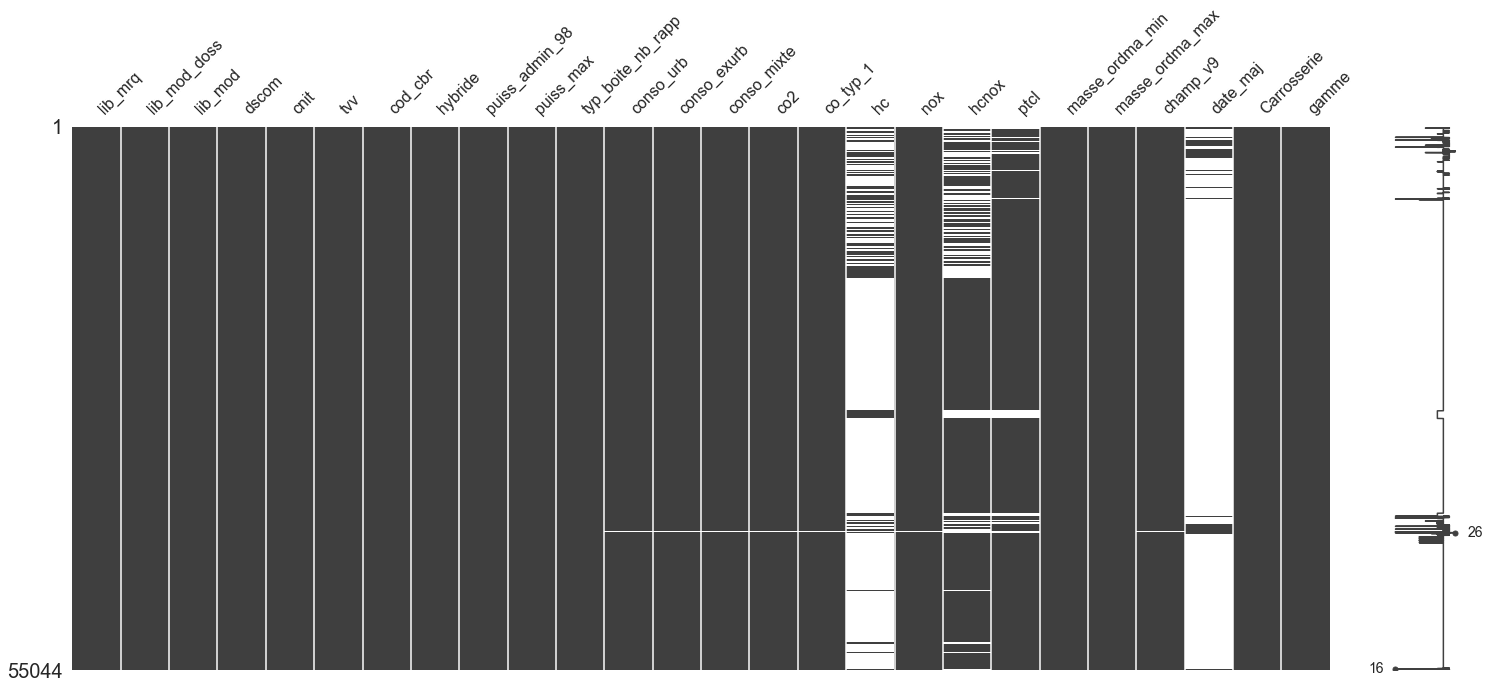

In [195]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

# Since there are many rows (+55k), to visualize every single row you can produce 
# a bigger version using figsize. Otherwise some empty rows won't be visible.
#msno.matrix(data, figsize=(25, 200))

#### Identify rows with many NAs
(before we focused our attention on columns, not rows)

In [196]:
ma_nas = data.isna().sum(axis=1).sort_values(ascending=False)

In [197]:
ma_9_nas = ma_nas > 9
ma_9_nas

39595     True
54928     True
41052     True
2068      True
39638     True
         ...  
2517     False
2516     False
2515     False
2514     False
2497     False
Length: 55044, dtype: bool

In [198]:
# How many rows have more than 9 NAs?
sum(ma_9_nas)

34

In [199]:
# Analyse these rows
data.loc[ma_9_nas]

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
1074,BMW,SERIE I,I3,i3,M10BM2VP000U002,BMWi-11Z210A040000,EL,non,3,75,...,NaN,NaN,NaN,NaN,1270,1270,NaN,mars-14,BERLINE,INFERIEURE
1354,CITROEN,C-ZERO,C-ZERO,C-ZERO,M10CTRVP005U582,1NZKYZ,EL,non,1,35,...,NaN,NaN,NaN,NaN,1140,1140,NaN,mars-14,BERLINE,ECONOMIQUE
2068,FORD,FOCUS ELECTRIC,FOCUS,FOCUS ELECTRIC,M10FCTVP000J332,DYB-BEVKDDA1K5XYEQE,EL,non,1,45,...,NaN,NaN,NaN,NaN,1700,1700,NaN,mars-14,BERLINE,MOY-INFER
7328,MERCEDES,CLASSE SLS,SLS AMG ED,SLS AMG Electric Drive,M10AMGVP0001323,197edF390Z1ZZAAA200,EL,non,15,220,...,NaN,NaN,NaN,NaN,2185,2185,NaN,mars-14,CABRIOLET,LUXE
7329,MERCEDES,CLASSE SLS,SLS AMG ED,SLS AMG Electric Drive,M10AMGVP0002324,197edF390Z1ZZAAB200,EL,non,15,220,...,NaN,NaN,NaN,NaN,2185,2185,NaN,mars-14,CABRIOLET,LUXE
39440,MIA,NON RENSEIGN?,MIA,mia 3PL 12 kWh,M10MAEVP000L018,VE79C23/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,890,890,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39441,MIA,NON RENSEIGN?,MIA,mia 3PL 12 kWh,M10MAEVP000L054,VE79C23/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,890,890,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39442,MIA,NON RENSEIGN?,MIA,mia 3PL 8 kWh,M10MAEVP000K017,VE79C13/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,839,839,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39443,MIA,NON RENSEIGN?,MIA,mia 3PL 8 kWh,M10MAEVP000K053,VE79C13/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,839,839,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39444,MIA,NON RENSEIGN?,MIA,mia L 3PL 12 kWh,M10MAEVP000R059,VE79L23/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,917,917,NaN,d�c-13,COMBISPACE,ECONOMIQUE


In [200]:
data.loc[ma_9_nas].iloc[0]

lib_mrq                             BMW
lib_mod_doss                    SERIE I
lib_mod                              I3
dscom                                i3
cnit                    M10BM2VP000U002
tvv                  BMWi-11Z210A040000
cod_cbr                              EL
hybride                             non
puiss_admin_98                        3
puiss_max                            75
typ_boite_nb_rapp                   V 0
conso_urb                           NaN
conso_exurb                         NaN
conso_mixte                         NaN
co2                                 NaN
co_typ_1                            NaN
hc                                  NaN
nox                                 NaN
hcnox                               NaN
ptcl                                NaN
masse_ordma_min                    1270
masse_ordma_max                    1270
champ_v9                            NaN
date_maj                        mars-14
Carrosserie                     BERLINE


For example what should we do for the above sample?

Since:
- BMW is not part of the test set, it is possible to delete it.
- Even the target variable (co2) is absent (NA). This is too much of an issue. To overcome this would require to use unsupervised clustering methods, or to use the remaining train set in order to impute the value (which would be close to data augmentation techniques).

The problem is that we would like to predict emissions for some of these cars (like *SMART*) even though they lack some data. These samples cannot be deleted. Thus we'll have to either:
- impute these NAs automatically (replace by a coherent value). Should be based on the training data only! - data leak otherwise.
- prevent our predictive model from using these variables (drop columns). Is a good option if the columns have a low predictive power on the target column - *CO2*.

For the sake of this example, let's delete the records that are not part of the test set without further investigation.

In [201]:
ma_9_nas_non_smart = data.loc[ma_9_nas]['lib_mrq'] != 'SMART'
idx_9_nas_non_smart = data.loc[ma_9_nas][ma_9_nas_non_smart].index
idx_9_nas_non_smart

Int64Index([ 1074,  1354,  2068,  7328,  7329, 39440, 39441, 39442, 39443,
            39444, 39445, 39446, 39447, 39448, 39449, 39450, 39451, 39452,
            39595, 39638, 39639, 40462, 40751, 41123, 41124, 54928],
           dtype='int64')

In [202]:
data.iloc[idx_9_nas_non_smart]

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
1074,BMW,SERIE I,I3,i3,M10BM2VP000U002,BMWi-11Z210A040000,EL,non,3,75,...,NaN,NaN,NaN,NaN,1270,1270,NaN,mars-14,BERLINE,INFERIEURE
1354,CITROEN,C-ZERO,C-ZERO,C-ZERO,M10CTRVP005U582,1NZKYZ,EL,non,1,35,...,NaN,NaN,NaN,NaN,1140,1140,NaN,mars-14,BERLINE,ECONOMIQUE
2068,FORD,FOCUS ELECTRIC,FOCUS,FOCUS ELECTRIC,M10FCTVP000J332,DYB-BEVKDDA1K5XYEQE,EL,non,1,45,...,NaN,NaN,NaN,NaN,1700,1700,NaN,mars-14,BERLINE,MOY-INFER
7328,MERCEDES,CLASSE SLS,SLS AMG ED,SLS AMG Electric Drive,M10AMGVP0001323,197edF390Z1ZZAAA200,EL,non,15,220,...,NaN,NaN,NaN,NaN,2185,2185,NaN,mars-14,CABRIOLET,LUXE
7329,MERCEDES,CLASSE SLS,SLS AMG ED,SLS AMG Electric Drive,M10AMGVP0002324,197edF390Z1ZZAAB200,EL,non,15,220,...,NaN,NaN,NaN,NaN,2185,2185,NaN,mars-14,CABRIOLET,LUXE
39440,MIA,NON RENSEIGN?,MIA,mia 3PL 12 kWh,M10MAEVP000L018,VE79C23/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,890,890,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39441,MIA,NON RENSEIGN?,MIA,mia 3PL 12 kWh,M10MAEVP000L054,VE79C23/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,890,890,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39442,MIA,NON RENSEIGN?,MIA,mia 3PL 8 kWh,M10MAEVP000K017,VE79C13/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,839,839,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39443,MIA,NON RENSEIGN?,MIA,mia 3PL 8 kWh,M10MAEVP000K053,VE79C13/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,839,839,NaN,d�c-13,COMBISPACE,ECONOMIQUE
39444,MIA,NON RENSEIGN?,MIA,mia L 3PL 12 kWh,M10MAEVP000R059,VE79L23/A,EL,non,1,10,...,NaN,NaN,NaN,NaN,917,917,NaN,d�c-13,COMBISPACE,ECONOMIQUE


The size of a dataset is often used to check manipulations went properly:

In [203]:
# How many cars have 9 NAs?
len_9_nas = data.loc[ma_9_nas].shape[0]
len_9_nas

34

In [204]:
# How many are SMART cars?
len_9_nas_non_smart = data.iloc[idx_9_nas_non_smart].shape[0]
n_9_nas_smart = len_9_nas - len_9_nas_non_smart
n_9_nas_smart

8

In [205]:
# How many cars with 9 NAs should then be dropped?
len_9_nas_non_smart

26

In [206]:
# Check for the lenght of the whole dataset
prev_length = data.shape[0]
prev_length

55044

In [207]:
# Check that dropping will work as expected (see how this operation is not inplace, it is just a test before actually dropping the samples)
new_length = data.drop(idx_9_nas_non_smart).shape[0]
new_length

55018

In [208]:
n_cars_dropped = prev_length - new_length
n_cars_dropped

26

In [209]:
# Since it removes the expected number of samples, it gives more confidence in its success.
# Let's now drop them for real
data.drop(idx_9_nas_non_smart, inplace=True)

In [210]:
# Check that samples have been dropped from the dataframe (yes we're good!)
data.shape[0]

55018

#### Impute NAs for hc, nox and hcnox

Looking back at the above functions *isna*, these quantities appear to be very sparse (have many NAs.) Since they could be useful, let's impute these NAs.

Based on the dictionary of variables (available on the website data.gouv.fr):
- **hcnox = hc + nox**

It is thus possible to:
- impute NAs from hc based on nox and hcnox
- impute NAs from nox based on hc and hcnox
- then drop the column hcnox, to prevent an over-representation of the same information

Let's try and see how it goes (uncomment the code to really see it!)

In [211]:
# temp_hc = data['hcnox'] - data['nox']

Oups, seems like there's an issue...

*TypeError: unsupported operand type(s) for -: 'str' and 'str'*

In other words, it is not possible to use the substraction *"-"* on strings (text). But we were doing it on numbers no?

In [212]:
# Check the type of hc and hcnox values
type(data['hc'][0])

str

Ok, now we understand the problem.

But why was this a string in the first place?

This is due to the different conventions used around the world for floats separators:
- In France the comma is used: 0,052
- while in the US the dot is used: 0.052


In [213]:
# Check this is in the wrong convention (Python likes dots! He's english after all)
data['hc'][0]

'0,052000001'

This could have been avoided at time of data loading. Using the parameter *"decimal"* of pandas read_csv function. It would have been this way:

In [214]:
data_with_good_decimal = pd.read_csv('mars-2014-complete 2.csv', sep=';', decimal=',')

In [215]:
data_with_good_decimal['hc'][0]

0.052000001

In [216]:
type(data_with_good_decimal['hc'][0])

numpy.float64

So what do we get?
- We specified that decimals **on the csv file** are commas. Python now interprets them as numbers (floats more precisely).
- So why is the final number displayed with a dot as a decimal separator? Because Python is an english gentleman, a float is necessary separated using a dot for him.

If we had made many transformation before getting to this point, we would like to keep our current work in progress. Let's try to do it manually, as a solution for these situations:

In [217]:
temp = data['hc'].apply(lambda x: float(str(x).replace(',', '.')))

In [218]:
temp[0]

0.052000001

In [219]:
type(temp[0])

numpy.float64

Seems like it worked pretty similarly.

Let's replace by the straight method since we have no interest in doing this manual method in the current situation. Just remember to drop "Unnamed *" columns again.

In [220]:
# We don't use the "copy" method here. It is just asking to redirect the 
# (memory) pointer of "data" toward the object "data_with_good_decimal".
# This prevents from using extra space unnecessarily.
# Be careful however as modifying data_with_good_decimal would also 
# consequently modify data.
data = data_with_good_decimal

In [221]:
# See how the address of data and data_with_good_decimal. As opposed to the$
# data_with_good_decimal address.
print(id(data))
print(id(data_with_good_decimal))
print(id(data_with_good_decimal.copy()))

4676057120
4676057120
4672820992


In [222]:
# Dropping Unnamed columns
data.drop(empty_cols_manual, axis=1, inplace=True)

Back to our previous issue: now that hc, nox and hcnox values are interpreted
as numbers, we should be able to deduce the missing values using the substract
function.

Let's extract the information from hcnox

In [223]:
hc_fill = data['hcnox'] - data['nox']
nox_fill = data['hcnox'] - data['hc']

Seems good!

In [224]:
print('HC NAs:')
print(data['hc'].isna().sum())
print(hc_fill.isna().sum())

print('\nNOX NAs')
print(data['nox'].isna().sum())
print(nox_fill.isna().sum())

HC NAs:
45271
9888

NOX NAs
158
55001


In [225]:
# Fill NAs using the information extracted from hcnox
temp_hc = data['hc'].fillna(value=hc_fill)

print(data['hc'].isna().sum())
print(temp_hc.isna().sum())

45271
158


In [226]:
# Fill NAs using the information extracted from hcnox
temp_nox = data['nox'].fillna(value=nox_fill)

print(data['nox'].isna().sum())
print(temp_nox.isna().sum())

158
158


No NA has been recovered for NOX, however there is a huge information recovery for HC:
- previously: 45271 NA
- currently: 158 NA

Let's apply this NA imputation for HC using the inplace argument

In [227]:
data['hc'].fillna(value=hc_fill, inplace=True)

In [228]:
# Check it has correctly been applied
data['hc'].isna().sum()

158

In [229]:
# Drop hcnox to prevent emphasizing the same information
data.drop(columns='hcnox', inplace=True)

How to deal with these 158 remaining NAs? Possibilities are:
- Drop them!
- Impute by the average (or median, or other)
- Impute by the average their cluster (better but more work)
- Impute using a model (predict the missing value)

In [230]:
# Check that NOX NAs correspond with HC NAs (are on the same rows)
hc_na_idx = data['hc'][data['hc'].isna()].index
data['nox'].iloc[hc_na_idx].isna().sum()

158

They do, great.

Now let's see the brands that are trapped in this NA series

In [231]:
data.iloc[hc_na_idx]['lib_mrq'].value_counts()

MERCEDES       71
LAMBORGHINI    28
VOLKSWAGEN     25
MIA            13
SMART           8
NISSAN          2
ALFA-ROMEO      2
TESLA           2
RENAULT         1
FORD            1
PEUGEOT         1
BMW             1
FIAT            1
CITROEN         1
MITSUBISHI      1
Name: lib_mrq, dtype: int64

Again, great news! Very few (SMART and Citroen) are from brands that we are trying to predict (AUDI, Citroen, Kia, Subaru, Smart, Mini).

Drop the rest:

In [232]:
# Create masks (to exclude) SMART and CITROEN
ma_smart = data.iloc[hc_na_idx]['lib_mrq'] == 'SMART'
ma_citroen = data.iloc[hc_na_idx]['lib_mrq'] == 'CITROEN'

# Combine the masks using "~" (not) and "|" (or)
idx_no_smart_no_citroen = data.iloc[hc_na_idx][~(ma_smart | ma_citroen)].index

# Get the index of the remaining rows (having NA values but neither SMART nor CITROEN)
ma_na_to_drop = data.iloc[idx_no_smart_no_citroen].index

# Drop them!
data.drop(ma_na_to_drop, inplace=True)

In [233]:
# Check that only SMART and CITROEN remain with some NAs in HC column
data[data['hc'].isna()]

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,co_typ_1,hc,nox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
1354,CITROEN,C-ZERO,C-ZERO,C-ZERO,M10CTRVP005U582,1NZKYZ,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1140,1140,NaN,mars-14,BERLINE,ECONOMIQUE
41013,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS CABRIO ED (35kW),M10SMTVP000X119,451E44E4Y0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1020,1020,NaN,mars-14,CABRIOLET,ECONOMIQUE
41014,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS CABRIO ED (35kW),M10SMTVP000Y120,451E44E4Z0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1020,1020,NaN,mars-14,CABRIOLET,ECONOMIQUE
41015,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS COUPE ED (35kW),M10SMTVP000U116,451E43E4Y0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1000,1000,NaN,mars-14,COUPE,ECONOMIQUE
41016,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS COUPE ED (35kW),M10SMTVP000V117,451E43E4Z0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1000,1000,NaN,mars-14,BERLINE,ECONOMIQUE
41029,SMART,FORTWO,FORTWO,SMART FORTWO CABRIO ED (35kW),M10SMTVP000S114,451E44E3Z0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,995,995,NaN,mars-14,CABRIOLET,ECONOMIQUE
41030,SMART,FORTWO,FORTWO,SMART FORTWO CABRIO ED (35kW),M10SMTVP000W118,451E44E3Y0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,995,995,NaN,mars-14,CABRIOLET,ECONOMIQUE
41051,SMART,FORTWO,FORTWO,SMART FORTWO COUPE ED (35kW),M10SMTVP000R113,451E43E3Z0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,975,975,NaN,mars-14,BERLINE,ECONOMIQUE
41052,SMART,FORTWO,FORTWO,SMART FORTWO COUPE ED (35kW),M10SMTVP000T115,451E43E3Y0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,975,975,NaN,mars-14,BERLINE,ECONOMIQUE


In [234]:
# Check the same for NOX column
data[data['nox'].isna()]

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,co_typ_1,hc,nox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
1354,CITROEN,C-ZERO,C-ZERO,C-ZERO,M10CTRVP005U582,1NZKYZ,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1140,1140,NaN,mars-14,BERLINE,ECONOMIQUE
41013,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS CABRIO ED (35kW),M10SMTVP000X119,451E44E4Y0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1020,1020,NaN,mars-14,CABRIOLET,ECONOMIQUE
41014,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS CABRIO ED (35kW),M10SMTVP000Y120,451E44E4Z0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1020,1020,NaN,mars-14,CABRIOLET,ECONOMIQUE
41015,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS COUPE ED (35kW),M10SMTVP000U116,451E43E4Y0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1000,1000,NaN,mars-14,COUPE,ECONOMIQUE
41016,SMART,FORTWO,FORTWO,SMART FORTWO BRABUS COUPE ED (35kW),M10SMTVP000V117,451E43E4Z0ZYAAA201,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,1000,1000,NaN,mars-14,BERLINE,ECONOMIQUE
41029,SMART,FORTWO,FORTWO,SMART FORTWO CABRIO ED (35kW),M10SMTVP000S114,451E44E3Z0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,995,995,NaN,mars-14,CABRIOLET,ECONOMIQUE
41030,SMART,FORTWO,FORTWO,SMART FORTWO CABRIO ED (35kW),M10SMTVP000W118,451E44E3Y0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,995,995,NaN,mars-14,CABRIOLET,ECONOMIQUE
41051,SMART,FORTWO,FORTWO,SMART FORTWO COUPE ED (35kW),M10SMTVP000R113,451E43E3Z0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,975,975,NaN,mars-14,BERLINE,ECONOMIQUE
41052,SMART,FORTWO,FORTWO,SMART FORTWO COUPE ED (35kW),M10SMTVP000T115,451E43E3Y0ZYAAA200,EL,non,1,35.0,...,NaN,NaN,NaN,NaN,975,975,NaN,mars-14,BERLINE,ECONOMIQUE


It's time to make some hard/clever choices about these NAs. Or isn't it?

In [235]:
# Check that the target values (co2) are present
remaining_hc_co2_na = data[data['hc'].isna()]['co2']
remaining_hc_co2_na

1354    NaN
41013   NaN
41014   NaN
41015   NaN
41016   NaN
41029   NaN
41030   NaN
41051   NaN
41052   NaN
Name: co2, dtype: float64

They are not. Which simplifies the choices. Since the true values of co2 for these samples don't exist, it would not possible to assess our model if we made predictions on them. Thus, again, drop them!

In [236]:
data.drop(remaining_hc_co2_na.index, inplace=True)

In [237]:
# Check there are no NA left
print(data['hc'].isna().sum())
print(data['nox'].isna().sum())

0
0


#### Impute NAs for ptcl

Only ptcl and date_maj remain with some NA values

In [238]:
# How many?
data['ptcl'].isna().sum()

2520

In [239]:
# Let's see the composition of this variable
data['ptcl'].value_counts()

0.001    27753
0.000    18274
0.002     2987
0.004     2771
0.003      561
0.007        8
0.023        6
0.005        3
0.010        3
Name: ptcl, dtype: int64

In [240]:
# Check that co2 is present for these samples with missing ptcl values
data[data['ptcl'].isna()]['co2'].isna().sum()

0

Options for imputation (reminder):
- deleting samples
- imputing the average (or median) value of the variable
- imputing the average value of a similar group within the variable:
    - manually
    - automatically

Side note:
- When the distribution is close to a "normal law" and symetric (skewness close to 0), imputing by the mean is similar to imputing by the median.
- If the distribution differs too much from a normal law and/or is far from symetric, imputing by the mean will be very different from the median.

For example:
- Imputing a missing salary by the mean might be a mistake. Since extremely large salaries will make the mean drift toward larger values. The mean isn't representative for what is tipically understood when talking about the "average people salary". In this case, the median is more appropriate since it won't be impacted at all by extreme values. When you impute a value (by the mean or the median) you often intent to use a value that is representative of the majority.


##### Ideas for manual exploration

<AxesSubplot:>

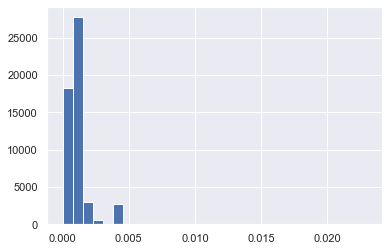

In [241]:
# Use the function "hist" of pandas.
# It is actually a re-use of a matplotlib.pyplot (and seaborn) function.
data['ptcl'].hist(bins=30)

The extreme values (detected using the value_counts function) is what makes an important empty space on the right side of the graph. Thus as described avobe, it might be dangereous to impute by the mean.

In [242]:
print(data['ptcl'].mean())
print(data['ptcl'].median())
print(data['ptcl'].std())

0.0008924302028033458
0.001
0.000989981894908469


The difference between the mean and the median is quite large in this case. There is 0.001 of difference. How do we know that it is large? Well, it equals the value of the standard deviation.

This confirms the large imprecision that imputing by the mean would do. Imputing by the median would be a better option.

However, it is even better to investigate further in order to identify whether the NA values correspond to an "average" car. If NA values are present only for big cars, it would not be a good option to impute neither by the mean nor by the median. In this latter case, it would be preferable to impute NAs using a value of ptcl that corresponds better to this kind of big cars (in this case, a higher ptcl).

Analyse the relation between ptcl missing values and co2

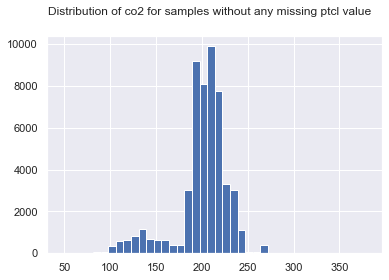

In [243]:
# Distribution of co2 for ptcl non-NAs
fig, ax = plt.subplots()
data[~data['ptcl'].isna()]['co2'].hist(bins=40)
fig.suptitle('Distribution of co2 for samples without any missing ptcl value')
plt.show()

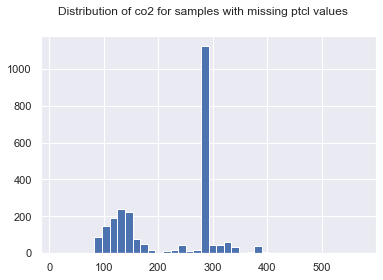

In [244]:
# Distribution of co2 for ptcl NAs
fig, ax = plt.subplots()
data[data['ptcl'].isna()]['co2'].hist(bins=40)
fig.suptitle('Distribution of co2 for samples with missing ptcl values')
plt.show()

There is a huge spike close to 300 for the missing values. It could be exploited for the imputation, but alone is not sufficient.

Analyse the relation between ptcl missing values and hc

<AxesSubplot:>

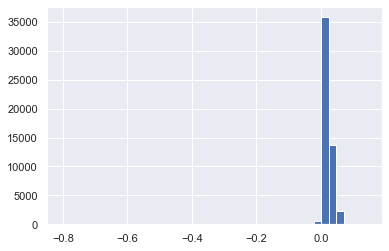

In [245]:
# Distribution of non-missing values
data[~data['ptcl'].isna()]['hc'].hist(bins=40)

<AxesSubplot:>

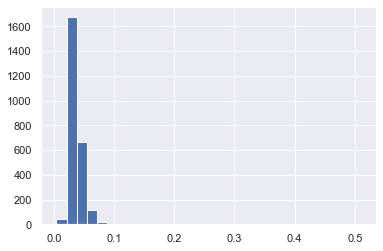

In [246]:
# Distribution of missing values
data[data['ptcl'].isna()]['hc'].hist(bins=30)

There is no clear pattern based on these graphs (don't be fooled by the extreme values distoring the graphs). hc distribution for ptcl NAs seem pretty similar to ptcl non-NA

Analyse the relation between ptcl missing values and puiss_max

<AxesSubplot:>

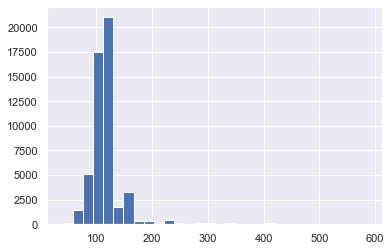

In [247]:
# Distribution of non-missing values
data[~data['ptcl'].isna()]['puiss_max'].hist(bins=30)

<AxesSubplot:>

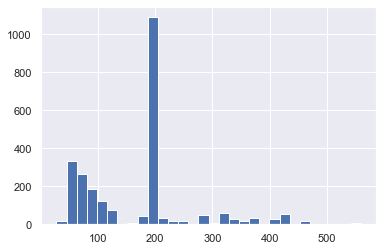

In [248]:
# Distribution of missing values
data[data['ptcl'].isna()]['puiss_max'].hist(bins=30)

Thanks to these last to graphs, we are able to identify a group. An important part of the missing values correspond to cars with mostly puiss_max:
- at 200
- large values of puiss_max (above 200)

It is a good identification since the rest of the dataset (first figure) has very few values at 200 and above.

However, imputing all the NA values using a ptcl corresponding to big cars is not good enough. It would create confusion for the model since another important group can be identified around 100 (which are the standard ptcl values).

It requires to cross the analysis with another variable to become more robust and prevent from bringing confusion to the model (degrading infortmation).

Now that you have the intuition, have fun with that!

##### Brutal but quick imputation

Careful as this might worsen the model performance. Droping samples with missing values could be less dangereous.

In [249]:
ptcl_avg = data['ptcl'].mean()
data['ptcl'].fillna(ptcl_avg, inplace=True)

In [250]:
# Checking operation success
data['ptcl'].isna().sum()

0

#### Impute NAs for date_maj

In [251]:
data['date_maj'].value_counts()

mars-14    2734
juin-13     222
d�c-13      107
mars-13      78
sept-13      14
Name: date_maj, dtype: int64

See if there is a correlation with the target variable before bothering imputing NAs.

For that, do a label encoding, i.e. replace each date by an integer.

This can be done automatically, but the manual operation is clear and transparent.

I let you have fun with that!

In [252]:
# Let's assume there is no correlation with co2
data.drop(columns='date_maj', inplace=True)

#### Check for remaining NAs

In [253]:
data.isna().any()

lib_mrq              False
lib_mod_doss         False
lib_mod              False
dscom                False
cnit                 False
tvv                  False
cod_cbr              False
hybride              False
puiss_admin_98       False
puiss_max            False
typ_boite_nb_rapp    False
conso_urb             True
conso_exurb           True
conso_mixte          False
co2                  False
co_typ_1             False
hc                   False
nox                  False
ptcl                 False
masse_ordma_min      False
masse_ordma_max      False
champ_v9             False
Carrosserie          False
gamme                False
dtype: bool

The remaining NAs are about the columns conso_* that we'll drop soon.

### Detect and treat outliers

We previously saw that *"ptcl"* has some extreme values. Let's inspect them to assess whether these are outliers (errors in the data) or coherent values.

In [254]:
data[data['ptcl'] == 0.023]

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,co2,co_typ_1,hc,nox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
3065,LEXUS,LS600,LS,LS 600h L V8 5.0L hybride,M10LEXVP000B058,HF4(a)UVF46(E)UVF46L-AEXGHW(1C),EH,oui,29,290.0,...,219.0,0.029,0.032,0.016,0.023,2485,2535,715/2007*692/2008EURO5,BERLINE,LUXE
3066,LEXUS,LS600,LS,LS 600h L V8 5.0L hybride,M10LEXVP000C059,HF4(a)UVF46(E)UVF46L-AEXGHW(2C),EH,oui,29,290.0,...,219.0,0.029,0.032,0.016,0.023,2475,2525,715/2007*692/2008EURO5,BERLINE,LUXE
3067,LEXUS,LS600,LS,LS 600h L V8 5.0L hybride,M10LEXVP000E122,HF4(a)UVF46(E)UVF46L-AEXGHW(1D),EH,oui,29,290.0,...,219.0,0.029,0.032,0.016,0.023,2485,2535,715/2007*692/2008EURO5,BERLINE,LUXE
3068,LEXUS,LS600,LS,LS 600h L V8 5.0L hybride,M10LEXVP000F123,HF4(a)UVF46(E)UVF46L-AEXGHW(2D),EH,oui,29,290.0,...,219.0,0.029,0.032,0.016,0.023,2475,2525,715/2007*692/2008EURO5,BERLINE,LUXE
3075,LEXUS,LS600,LS,LS 600h V8 5.0L hybride,M10LEXVP0008055,HF4(a)UVF45(E)UVF45L-AEXGHW(1C),EH,oui,29,290.0,...,218.0,0.029,0.032,0.016,0.023,2365,2495,715/2007*692/2008EURO5,BERLINE,LUXE
3076,LEXUS,LS600,LS,LS 600h V8 5.0L hybride,M10LEXVP000B119,HF4(a)UVF45(E)UVF45L-AEXGHW(1D),EH,oui,29,290.0,...,218.0,0.029,0.032,0.016,0.023,2365,2495,715/2007*692/2008EURO5,BERLINE,LUXE


With some knowledge on cars and/or motors we understand that these are big cars with big motorizations (otherwise compare to the rest of the dataset), indeed:
- dscom: V8 5.0L is a huge motor
- puiss_max: 290kw is huge compared to your average car that might be around 100kw.
- masse_ordma_min/max: lies between 2365 and 2535. Again your average car is closer to 1000kg. 

However, other cars are big within this dataset, and only this brand reaches such large values. Compare to others in order to assess whether these are errors or not.

In [255]:
# Compare ratio ptcl/puiss_max for different brands
def hist_ratio_ptcl_puissmax(brand):
    ma_brand = data['lib_mrq'] == brand.upper()
    ratio_brand = data[ma_brand]['ptcl'] / data[ma_brand]['puiss_max']
    ratio_brand.hist()

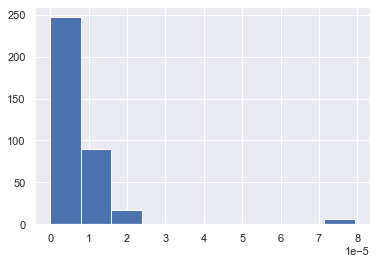

In [256]:
hist_ratio_ptcl_puissmax('lexus')

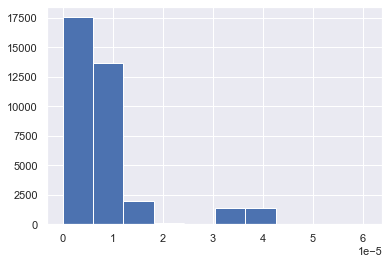

In [257]:
hist_ratio_ptcl_puissmax('mercedes')

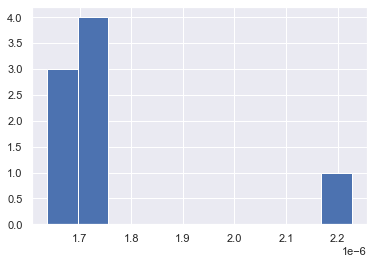

In [258]:
hist_ratio_ptcl_puissmax('LAMBORGHINI')

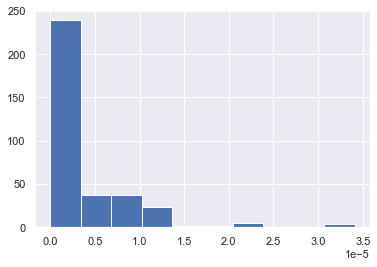

In [259]:
hist_ratio_ptcl_puissmax('AUDI')

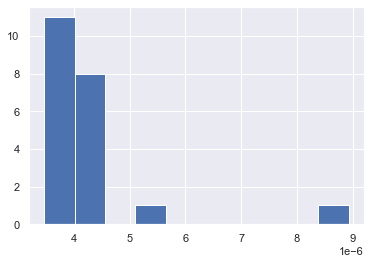

In [260]:
hist_ratio_ptcl_puissmax('LOTUS')

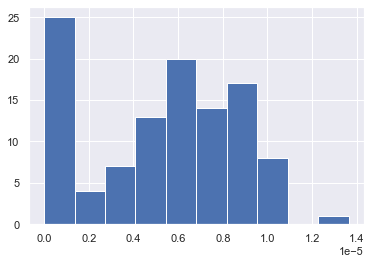

In [261]:
hist_ratio_ptcl_puissmax('porsche')

Analysis ratio ptcl/puiss_max:
- the max value varies from 1.5 to 9 on the above brands
- the form of the distribution also differs
- it confirms that a ratio of 8 does not seem to be abnormal (see lotus at 9).

The large ptcl of LEXUS is not an outlier.

Outliers might better be detected during the next phase of descriptive statistics

## Descriptive statistics of quantitative variables

### Univariate analysis (a single variable at a time)

In [262]:
# Use describe function now that variables are in the correct (numerical) format.
data.describe()

,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,hc,nox,ptcl,masse_ordma_min,masse_ordma_max
count,54886.000000,54886.000000,54877.000000,54877.000000,54886.000000,54886.000000,54886.000000,54886.000000,54886.000000,54886.000000,54886.000000,54886.000000
mean,10.536166,118.890240,9.561726,6.724364,7.756053,201.547243,0.181007,0.023981,0.299160,0.000892,2102.281219,2341.369384
std,5.052757,44.939204,2.053410,1.030333,1.366168,33.751927,0.145014,0.014061,0.416944,0.000967,293.226519,422.643893
min,2.000000,28.000000,0.000000,2.800000,0.600000,13.000000,0.005000,-0.801000,0.000000,0.000000,825.000000,825.000000
25%,9.000000,100.000000,8.800000,6.500000,7.300000,193.000000,0.061000,0.013000,0.197000,0.000000,1982.000000,2075.000000
50%,10.000000,120.000000,9.400000,6.900000,7.800000,203.000000,0.137000,0.022000,0.214000,0.001000,2076.000000,2355.000000
75%,10.000000,120.000000,10.200000,7.200000,8.300000,216.000000,0.297000,0.032000,0.228000,0.001000,2246.000000,2709.000000
max,81.000000,585.000000,41.099998,14.900000,24.500000,572.000000,0.968000,0.510000,1.846000,0.023000,2760.000000,3094.000000


/Users/alexisbogroff/Installs/miniforge3/envs/eda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


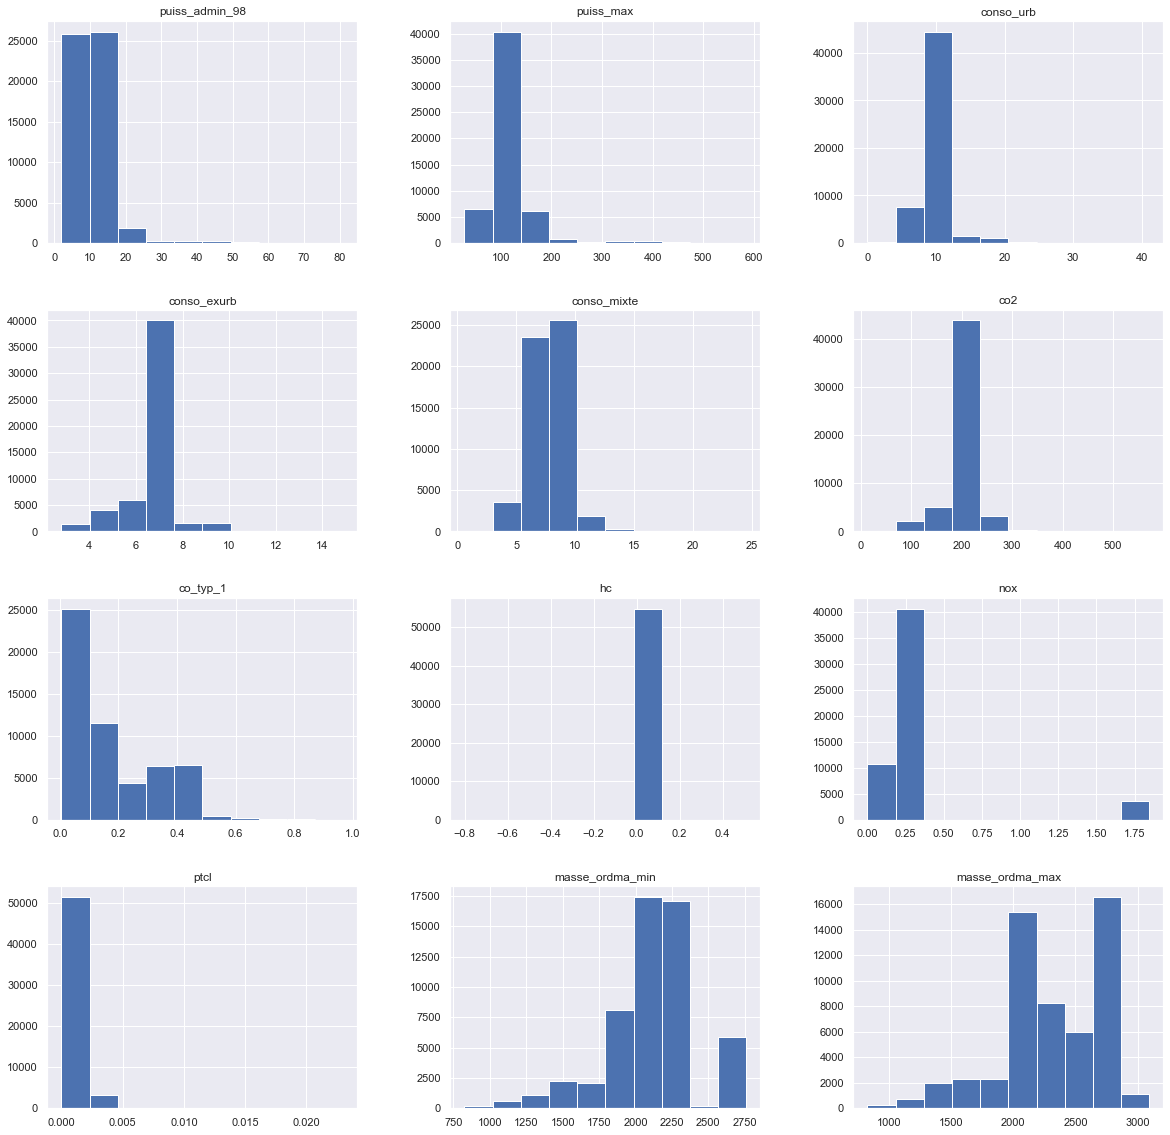

In [263]:
# Have a quick idea of the distributions
data.hist(figsize=(20, 20))
plt.show()

#### Analyse each variable based on their distribution

puiss_admin_98:
- range [0-80]
- Very large concentration on small values [0-20[
- A small but similar number of cars ranging from 30 to 60

Which means that most cars have a relatively low to medium puiss_admin_98. And some cars can go up 3 to 6 times the average

puiss_max:
- range ]30-500]
- almost symmetrically distributed and centered around 120
- excepted a long right tail from 200 to 500 with very few values
- large kurtosis very narrowed around the center

co2:
- range [90-400[
- almost symmetrically distributed and centered around 220
- large kurtosis very narrowed around the center
- a long right tail so small it isn't visible (but still stretches the graph to the right)

co_typ_1:
- range [0-0.8]
- right-skewed (positively skewed) distribution
- most values at 0

There is no extreme value. The number of cars decreases linearly with the co_typ_1 values.

hc:
- range [-.08-0.4[
- some extreme negative values from -0.8 and positive at 0.4
- centered and very narrowed around 0+

nox:
- range [0-1.75]
- most values between 0 and 0.25
- a significant number of extreme values at 1.75

ptcl:
- range [0-0.002]
- most values around 0+ - 0.005
- some extreme values up to 0.002

masse_ordma_min:
- range ]750-2750]
- closer to a normally distributed variable
- slighly left-skewed
- very few values at 2500 strangely
- centered around 2100

masse_ordma_max:
- range ]800-3000]
- closer to a normally distributed variable
- slighly left-skewed
- seems to have 2 modes at 2100 and 2700

#### Analyse relation between variables based on their distribution

Similar shapes:
- puiss_max, co2, hc, nox, ptcl: highly narrowed (high kurtosis)
- masse_ordma_min, masse_ordma_max: close to normal and very similar values

### Bivariate Analysis (two variables at a time)

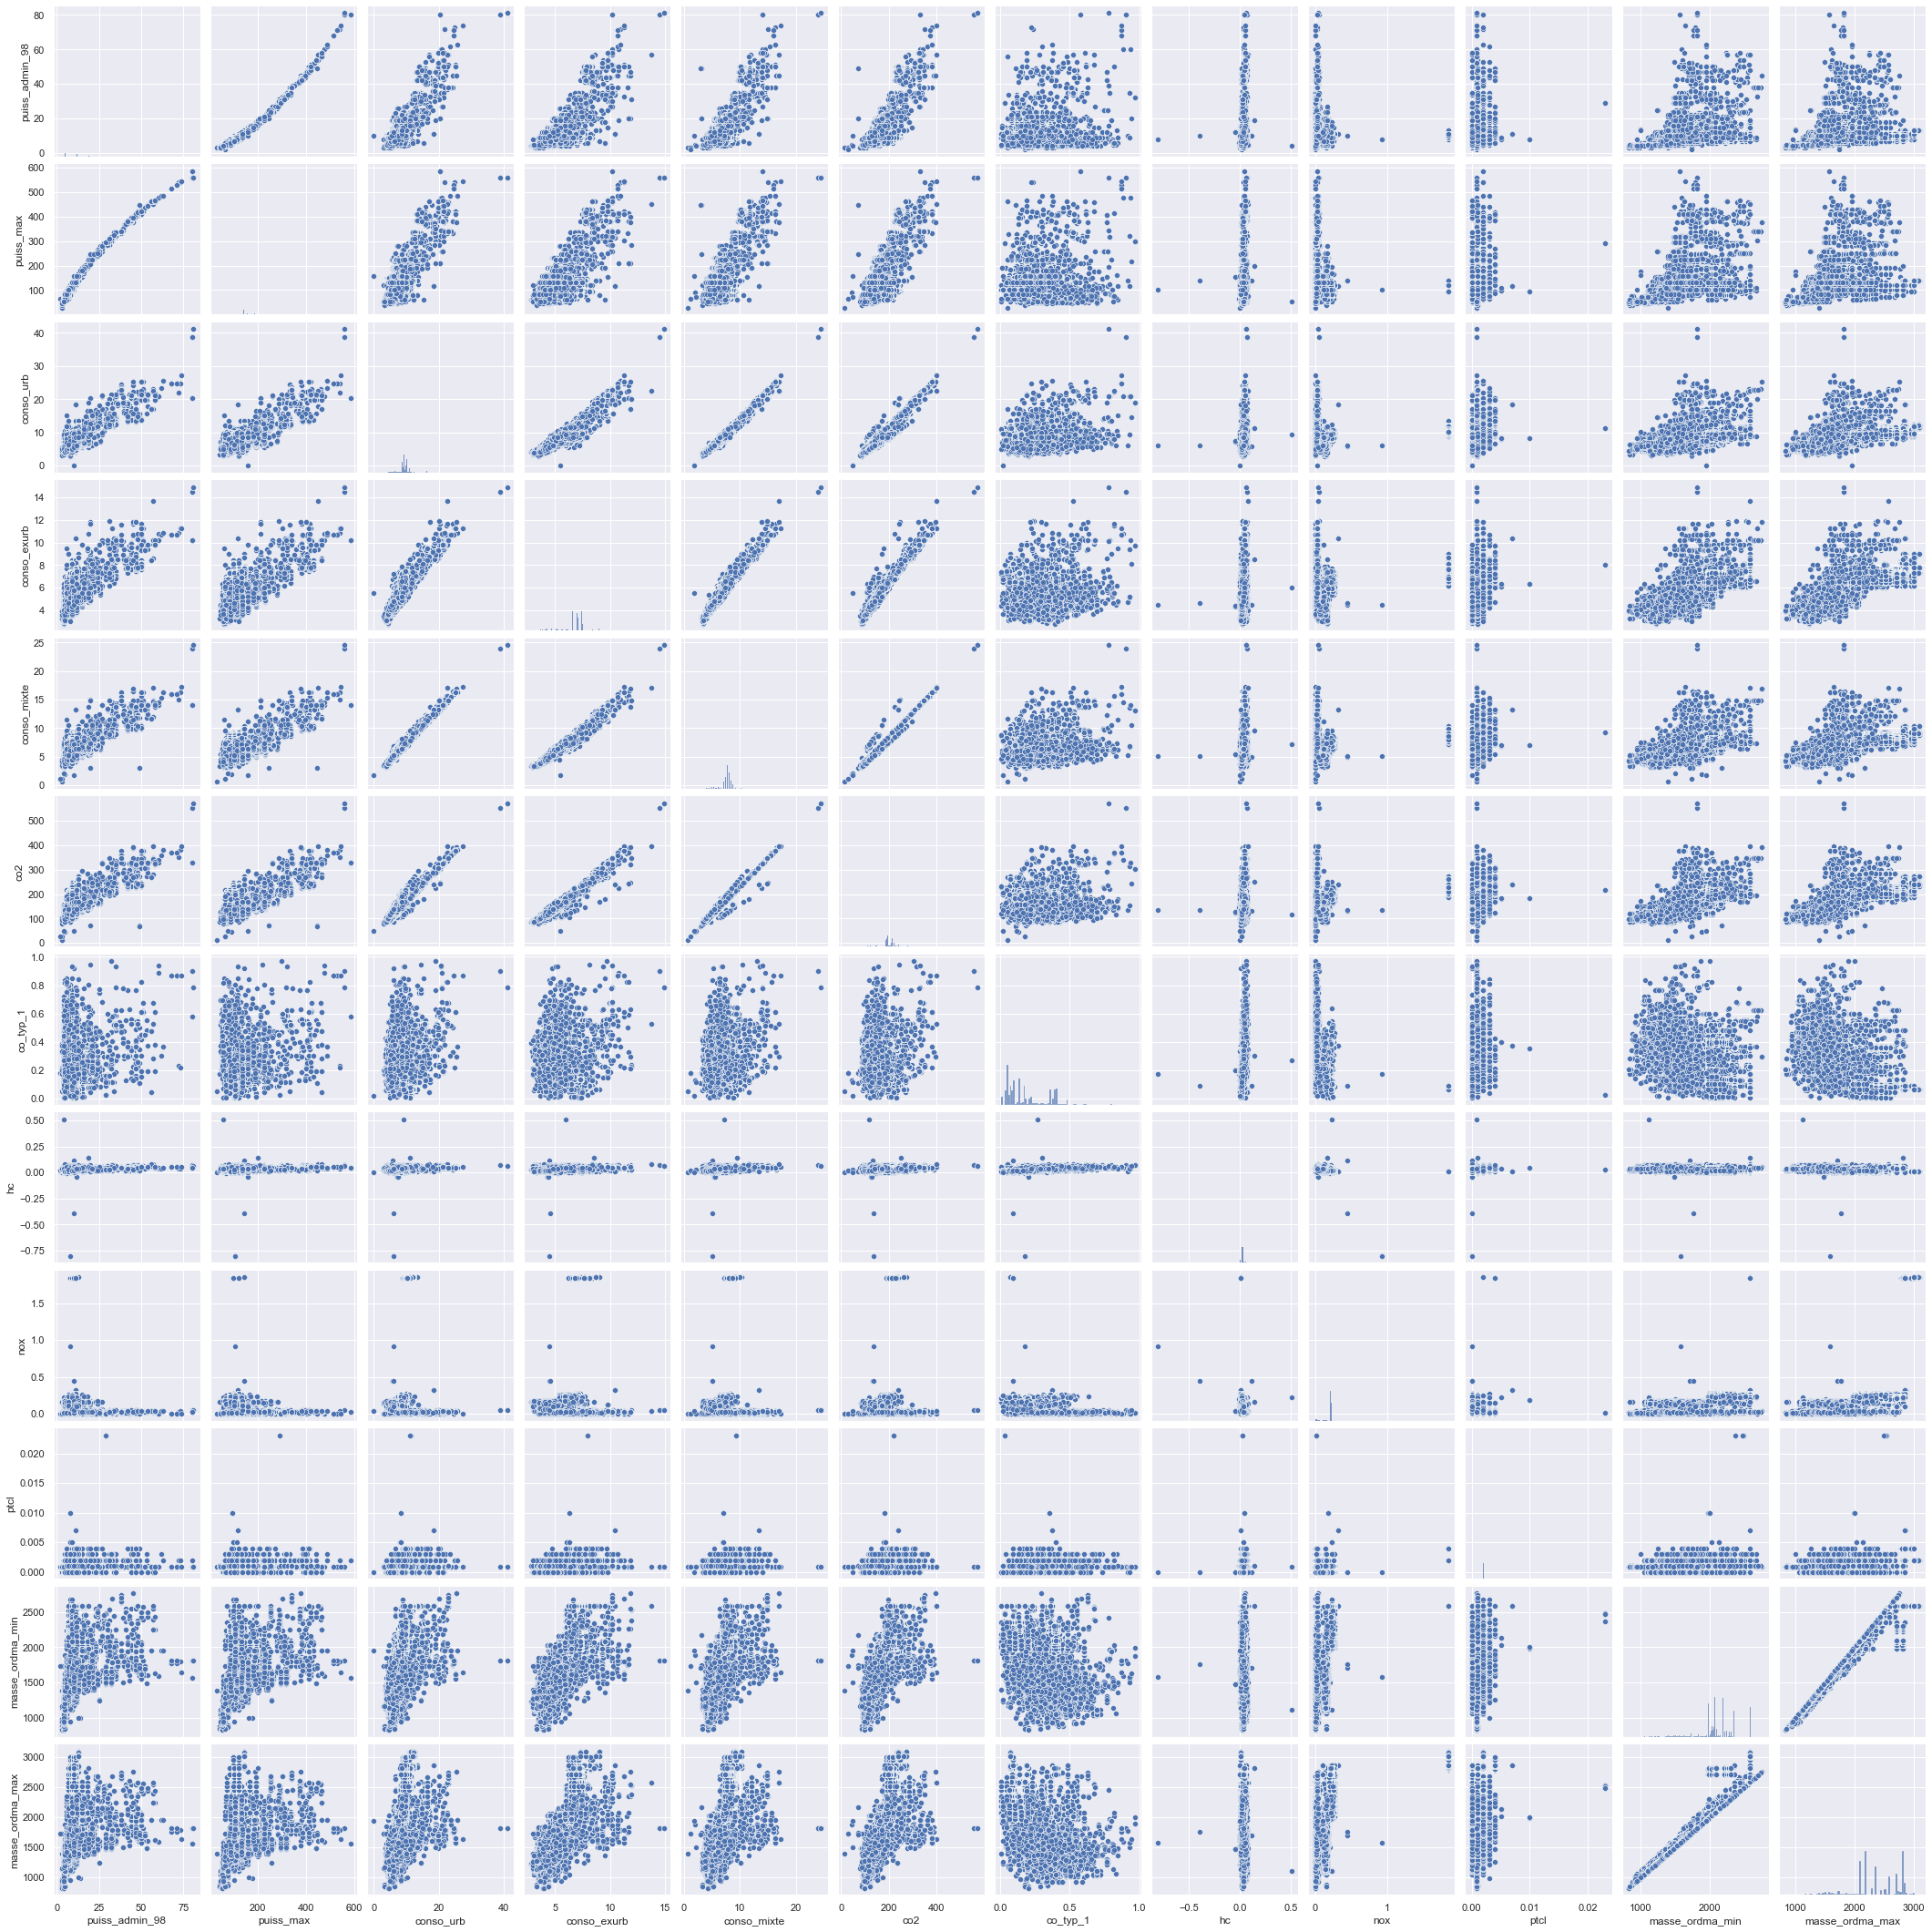

In [264]:
sns.pairplot(data)

The pairplot of all variables is very dense. It can help in visualizing:
- the relation between pairs of variables
- outliers that would not be percieved during the univariate analysis

For example masse_ordma_max with masse_ordma_min:
- during univariate, seemed to be very similar. This is confirmed.
- have a clear positive linear relation
- a group can be identified as outlier, which doesn't fit into the main linear relation. This can be verified using a confidence interval

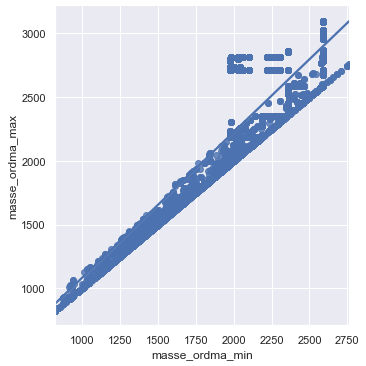

In [265]:
# Check outliers using confidence intervals
sns.lmplot(data=data, x='masse_ordma_min', y='masse_ordma_max')

- Some grouped points indeed go out of the 95% confidence interval.
- They might be deleted to enhance the performances, since:
    - they might be errors
    - even if they aren't errors, they might complicate too much the modelization

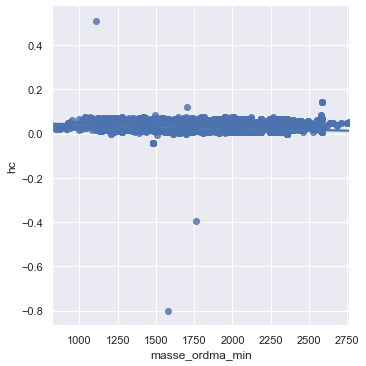

In [266]:
# Outliers with HC
sns.lmplot(data=data, x='masse_ordma_min', y='hc')

Some points appear as clear outliers. However, these points were already visible on the univariate analysis of HC. The pairplot was not necessary for their identification.

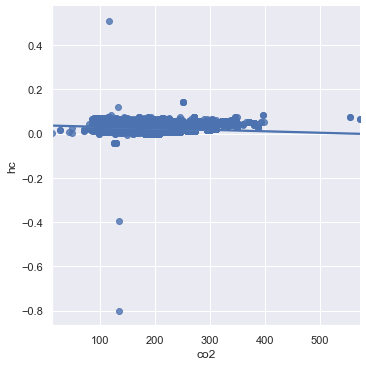

In [267]:
# Outliers with HC (another)
sns.lmplot(data=data, x='co2', y='hc')

We can see that the combination with other variables give the same result. The outliers were again clearly identifiable during the univariate analysis of HC.

In contrast, the paiplot made possible the identification of outliers for masse_ordma_min and masse_ordma_max. These outliers were not identifiable during the univariate analysis of both variables.

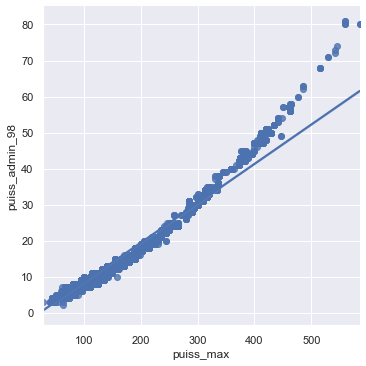

In [268]:
# Study puiss_max and puiss_admin_98 relation
sns.lmplot(data=data, x='puiss_max', y='puiss_admin_98')

It is interesting to see how puiss_max and puiss_admin_98 follow a positive curved relation. It is close but not exactly a positive linear relation. This should be taken into account during the modelization phase.

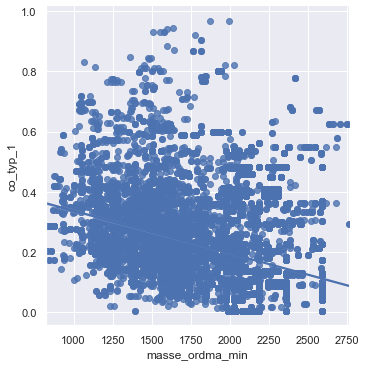

In [269]:
# Study masse_ordma_min and co_typ_1
sns.lmplot(data=data, x='masse_ordma_min', y='co_typ_1')

On the latter, one can see the nice distribution of points centered around 0.3 co_typ_1 and 1500 masse_ordma_min, but at the same time having a dispersion that could correspond to a 
normal law (it does not come from a uniform law since points are fewer as we go further from the center).

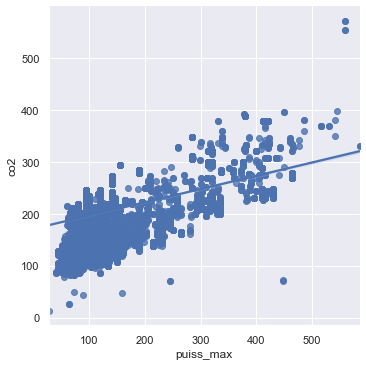

In [270]:
# Study puiss_max and co2
sns.lmplot(data=data, x='puiss_max', y='co2')

- There is a clean positive linear relation between puiss_max and co2
- Few points can be identified as outlier
- The dispersion around the line is quite important but also constant (the same at any point of puiss_max)

#### Study correlations
The two main goals are to find:
- interesting features that are greatly correlated with the target (great!)
- multi-colinearity, i.e. features that are greaty correlated with other features (bad!)

<AxesSubplot:>

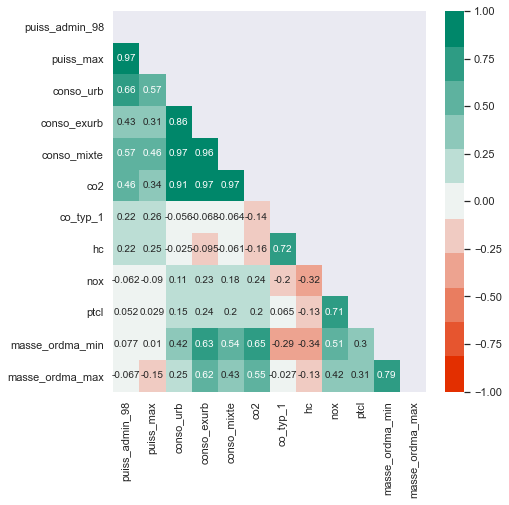

In [271]:
# Don't be afraid by these fancy lines
# The correlation matrix is simply obtained using data.corr()
import numpy as np
mask = np.triu(data.corr())
fig, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(15, 160, n=11, s=100)

sns.heatmap(data.corr(),
            mask=mask,
            annot=True,
            cmap=cmap,
            center=0,
            vmin=-1,
            vmax=1,
            ax=ax)

Ps: See how conso_* variables are highly correlated? (around 96%). That's why I asked you to drop them for the project. It would have require nothing else than one of these conso_* variables otherwise to predict efficiently the co2.

In [272]:
cols_conso_names = ['conso_urb', 'conso_exurb', 'conso_mixte']
data.drop(cols_conso_names, axis=1, inplace=True)

Analysis of multi-colinearity (below -30 or above 30 is already dangerous):

- Delete one of them immediatly!
    - 0.90 - puiss_max with puiss_admin_98
    - 0.79 - masse_ordma_min with masse_ordma_max
    - 0.72 - hc with co_typ_1
    - 0.71 - ptcl with nox
- Study carefully before droping one of them:
    - 0.51 - masse_ordma_min with nox
    - 0.42 - masse_ordma_max with nox
    - 0.31 - masse_ordma_max with ptcl
    - 0.30 - masse_ordma_min with ptcl
    - -0.29 - masse_ordma_min with co_typ_1
    - -0.32 - nox with hc
    - -0.34 - masse_ordma_min with hc

Many features are tied to other features. The choice is complicated for each of them whether to drop it or not. The PCA can help in solving this problem by keeping the principal features (eigenvectors, which are orthogonal between each other, which means not correlated at all). You will work on the PCA in other courses of this curriculum.

The problem when droping a feature is that some models could take advantage of using both multi-colinear variables, and exploit the little information that they have not in common. However, many models would also be disturbed (hear: having bad performances) because of multi-colinear variables, which would over represent an information at the expense of the rest.

#### Delete multi-colinear features

puiss_max with puiss_admin_98:
- puiss_admin_98 is based on puiss_max (comes from domain expertise that you may know if you have been a car owner)
- thus, puiss_max is a more precise information
- it can be interesting to delete puiss_admin_98, check the model performance, then put it back in the dataset, and drop puiss_max. It can help in seeing what is the most effective to have a great performance.
- Having the root information seems a better option (keeping puiss_max), but it might be overwhelming for the model that could prefer working with categories having few modalities (depends on the model).

Which one to drop then?
- puiss_admin_98 has a correlation of 0.46 with co2 (the target)
- puiss_max has a correlation of 0.34

Remember, the greater the correlation with the target, the better the chances of predicting it accurately!
- => Thus, drop puiss_max

In [273]:
# Number of values in puiss_admin_98
len(data['puiss_admin_98'].unique())

66

In [274]:
# Number of values in puiss_max
len(data['puiss_max'].unique())

229

In [275]:
data.drop('puiss_max', axis=1, inplace=True)

masse_ordma_min with masse_ordma_max:

Based on the same methodology than the puiss_max analysis:
- => drop masse_ordma_max, as its correlation with co2 (0.55) is lower than masse_ordma_min (0.65)

In [276]:
data.drop('masse_ordma_max', axis=1, inplace=True)

hc with co_typ_1 (idem):
- => drop co_typ_1, since its absolute correlation with co2 is lower than hc

In [277]:
data.drop('co_typ_1', axis=1, inplace=True)

ptcl with nox (idem):
- => drop ptcl, since its absolute correlation with co2 is lower than nox

In [278]:
data.drop('ptcl', axis=1, inplace=True)

In [279]:
data.columns

Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cnit', 'tvv', 'cod_cbr',
       'hybride', 'puiss_admin_98', 'typ_boite_nb_rapp', 'co2', 'hc', 'nox',
       'masse_ordma_min', 'champ_v9', 'Carrosserie', 'gamme'],
      dtype='object')

## Work with qualitative variables (quategorical)

### Drop or transform them

lib_mrq:

Even though a brand knwon in advance might help in predicting the co2, since in this project the brands cannot be known in advance it is not possible to base the model on this information.

We don't drop it however, since the variable is needed to further split the dataset into training and testing sets.

lib_mod:

Many very interesting keywords could be extracted from this feature:
- V8, V12, etc.
- sport
- coupe
- limousine
- cabriolet
- cc

Which might all be good indicators of vehicules that consume large amounts of gazoline, and thus generating large co2 emissions. However, some information might also be found in other features such as the puiss_admin_98 or the masse_ordma_min, since heavy and powerful cars correspond precisely to these keywords.

An even more interesting kind of keywords could be:
- hybrid

Since this type of cars could be heavy and powerful, but still procude low co2 emissions. But there already exists a feature for this information.


However this has to do with text-mining. You are free to try to exploit this feature, but this is not required in this project.

To go further, NLP models could find automatically the keywords that have the greatest predictive power, but be careful as many keywords are specific to a brand, and thus might not be applicable to other brands.

For simplicity, the feature is here dropped.

lib_mod_doss: is very similar and could be also dropped

In [280]:
sum(data['lib_mod'] != data['lib_mod_doss'])

5924

In [281]:
data.drop('lib_mod', axis=1, inplace=True)
data.drop('lib_mod_doss', axis=1, inplace=True)

dscom: is also very similar and could also be dropped
even though some keywords like 'stop and start' might have a predictive power

In [282]:
data.drop('dscom', axis=1, inplace=True)

cnit: cannot be exploited. A deeper investigation on internet on the way this code is built could eventually bring information to confirm or not this statement.

In [283]:
data.drop('cnit', axis=1, inplace=True)

tvv: idem than cnit.

In [284]:
data.drop('tvv', axis=1, inplace=True)

cod_cbr:
- hypothese: different carburants procude different co2 emissions
- this can be tested by assessing the model prediction, or the correlation with the co2.
- there are few modalities, transforming the variable won't require the creation of many columns (which could drawn the model by creating noise). But still be careful as this double the number of existing features and could over-represent this information.

It seems interesting enough to transform the variable into a numerical version (which can thus be later used by the model).

In [285]:
data['cod_cbr'].unique()

array(['ES', 'GO', 'ES/GP', 'GP/ES', 'EH', 'EE', 'GH', 'ES/GN', 'GN/ES',
       'FE', 'GN', 'GL'], dtype=object)

In [286]:
cod_cbr_dummies = pd.get_dummies(data['cod_cbr'])
cod_cbr_dummies

,EE,EH,ES,ES/GN,ES/GP,FE,GH,GL,GN,GN/ES,GO,GP/ES
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55039,0,0,0,0,0,0,0,0,0,0,1,0
55040,0,0,0,0,0,0,0,0,0,0,1,0
55041,0,0,0,0,0,0,0,0,0,0,1,0
55042,0,0,0,0,0,0,0,0,0,0,1,0


In [287]:
data.drop('cod_cbr', axis=1, inplace=True)

In [288]:
data = pd.concat([data, cod_cbr_dummies], axis=1)

hybride:
- is definitely a must have (has to impact the co2 emissions)
- is a boolean, so it won't require creating new features. A simple label encoding do the work.

In [289]:
data['hybride'].replace({'oui': 1, 'non': 0}, inplace=True)

typ_boite_nb_rapp:
- extract the number of speeds

In [290]:
data['typ_boite_nb_rapp'].unique()

array(['M 6', 'A 6', 'D 6', 'M 5', 'V 0', 'A 7', 'A 8', 'A 5', 'A 4',
       'D 7', 'D 5', 'A 9', 'S 6', 'M 7', 'V .'], dtype=object)

In [291]:
# Extract the number (using a regex expression)
n_rapp_temp = data['typ_boite_nb_rapp'].str.extract("([0-9])")
# Replace the '.' or any non-number by 0 (dangerous but quick hypothesis)
n_rapp_temp.fillna(0, inplace=True)

# Further: one-hot encode the letter (not done here)

In [292]:
# Check the values are coherent
n_rapp_temp[0].unique()

array(['6', '5', '0', '7', '8', '4', '9', 0], dtype=object)

In [293]:
n_rapp_temp = n_rapp_temp.astype('int')

In [294]:
# Replace the current feature
data['typ_boite_nb_rapp'] = n_rapp_temp

In [295]:
# Rename the column label to correspond to the new information
data.columns = data.columns.str.replace('typ_boite_nb_rapp', 'nb_rapp')

champ_v9:
- investigation on internet could yield much benefit, and decide how to extract information.
- for simplicity, let's assume the last date contained is the most useful

In [296]:
data['champ_v9'].unique()

array(['715/2007*692/2008EURO5', '715/2007*195/2013EURO6',
       '715/2007*195/2013EURO5', '715/2007*630/2012EURO6',
       '715/2007*630/2012EURO5', '"715/2007*566/2011EURO5',
       '"715/2007*630/2012EURO5', '"715/2007*195/2013EURO6',
       '"715/2007*195/2013EURO5', '"715/2007*630/2012EURO6',
       '"715/2007*566/2011EURO6', '715/2007*566/2011EURO5',
       '"715/2007*143/2013EURO5', '"715/2007*692/2008EURO5',
       '"715/2007*143/2013EURO6', '"715/2007*459/2012EURO5',
       '715/2007*459/2012EURO5', '715/2007*459/2012EURO6',
       '715/2007*195/20', '715/2007*195/2013EU', '715/2007*195/201',
       '715/2007*195/2013EUR', '715/2007*630/2012EURO', '715/2007*1',
       '715/2007*', '715/2007*195/2013', '715/2007*630/20',
       '"2005/55*2008/74EEV', '"2005/55*2008/74EURO5',
       '"715/2007*459/2012EURO6', '715/20', '715/2007*143/2013EURO5',
       '715/2007*459/2012EURO', '"595/2009*64/2012EURO6',
       '715/2007*459/2012EU'], dtype=object)

In [297]:
# Extract 4 digits [0-9]{4} twice
dates_extract = data['champ_v9'].str.extract(r"(20[0-9]{2})?.*(20[0-9]{2})")[1]
dates_extract.head(4)

0    2008
1    2008
2    2008
3    2008
Name: 1, dtype: object

In [298]:
dates_extract.isna().sum()

2

In [299]:
dates_extract.value_counts()

2008    28386
2013    17621
2011     5209
2012     3655
2007       13
Name: 1, dtype: int64

In [300]:
# Impute NA by the majority class
dates_extract.fillna(2008, inplace=True)

In [301]:
dates_extract = dates_extract.astype('int')

In [302]:
data['champ_v9'] = dates_extract

In [303]:
data.columns = data.columns.str.replace('champ_v9', 'champ_v9_max_date')

Carrosserie:
- the categories seem to have an order
- although it could be tempting to label encode this feature, the information might be heavily correlated with either the weight (mass_ordma_min) or the power (puiss_admin_98).

Let's rather drop it

In [304]:
data['Carrosserie'].unique()

array(['BERLINE', 'BREAK', 'COUPE', 'CABRIOLET', 'TS TERRAINS/CHEMINS',
       'COMBISPACE', 'MINISPACE', 'MONOSPACE COMPACT', 'MONOSPACE',
       'MINIBUS', 'COMBISPCACE'], dtype=object)

In [305]:
data.drop('Carrosserie', axis=1, inplace=True)

gamme:
- the modalities clearly have an order
- it might bring new information compared to weight and power

Let's label encode it (manually since we need to ensure the right order)

In [306]:
data['gamme'].unique()

array(['MOY-SUPER', 'LUXE', 'MOY-INFER', 'INFERIEURE', 'SUPERIEURE',
       'ECONOMIQUE', 'MOY-INFERIEURE'], dtype=object)

In [307]:
# Hypothesis: economique is equivalent to "MOY", i.e. better than MOY-INFER.
# See how we are also correcting an issue: MOY-INFER should be considered as MOY-INFERIEURE
gamme_labels = {
    'LUXE': 5,
    'SUPERIEURE': 4,
    'MOY-SUPER': 3,
    'ECONOMIQUE': 2,
    'MOY-INFER': 1,
    'MOY-INFERIEURE': 1,
    'INFERIEURE': 0,
}

In [308]:
data['gamme'].replace(gamme_labels, inplace=True)

In [309]:
data['gamme'] = data['gamme'].astype('int')

Now that much work and transformations have been done, check that no NA appeared in the process.

In [310]:
data.isna().any()

lib_mrq              False
hybride              False
puiss_admin_98       False
nb_rapp              False
co2                  False
hc                   False
nox                  False
masse_ordma_min      False
champ_v9_max_date    False
gamme                False
EE                   False
EH                   False
ES                   False
ES/GN                False
ES/GP                False
FE                   False
GH                   False
GL                   False
GN                   False
GN/ES                False
GO                   False
GP/ES                False
dtype: bool

### Analysis

#### hybride

Text(25.125, 0.5, 'log number of cars')

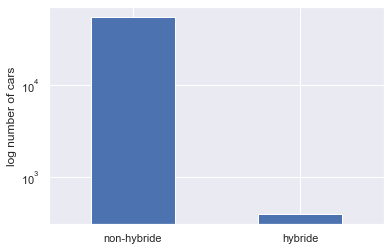

In [311]:
fig, ax = plt.subplots()
fig.canvas.draw()
labels = ['non-hybride', 'hybride']

data['hybride'].value_counts().plot.bar()

ax.set_xticklabels(labels)
plt.xticks(rotation=0)
plt.yscale("log")

ax.set_ylabel('log number of cars')

In [312]:
data['hybride'].value_counts()

0    54497
1      389
Name: hybride, dtype: int64

In [313]:
data[['co2', 'hybride']].corr()

,co2,hybride
co2,1.000000,-0.172095
hybride,-0.172095,1.000000


Even though the correlation is relatively low, many models could benefit from using this variable.

#### nb_rapp

<AxesSubplot:ylabel='Frequency'>

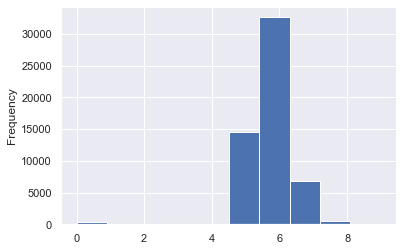

In [314]:
data['nb_rapp'].plot.hist()

In [315]:
data['nb_rapp'].value_counts()

6    32606
5    14550
7     6832
8      524
0      315
9       35
4       24
Name: nb_rapp, dtype: int64

Most cars have 6 speeds.

Let's correct the outliers having 0 speeds by the mode (6).

In [316]:
ma_0_speeds = data['nb_rapp'] == 0
data.loc[ma_0_speeds, 'nb_rapp'] = 6

<AxesSubplot:ylabel='Frequency'>

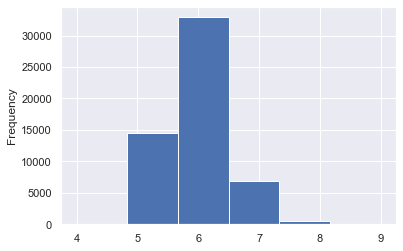

In [317]:
data['nb_rapp'].plot.hist(bins=6)

<AxesSubplot:xlabel='nb_rapp', ylabel='co2'>

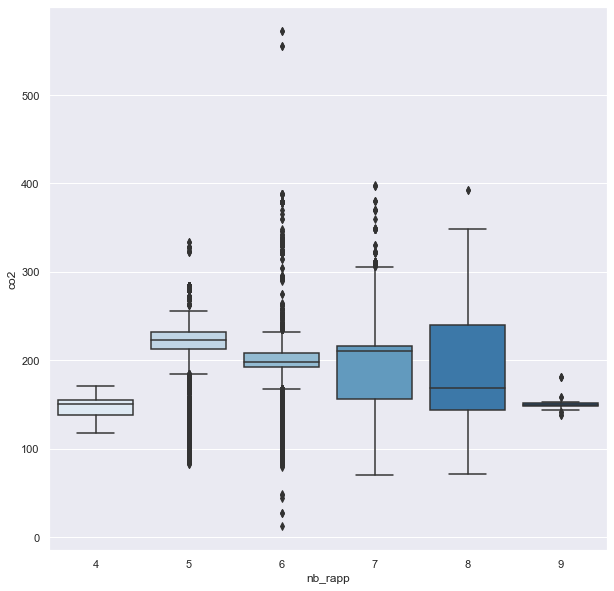

In [318]:
plt.subplots(figsize=(10, 10))
data_nb_rapp_sorted = data[['co2', 'nb_rapp']].sort_values(by = 'nb_rapp')
sns.boxplot(data=data_nb_rapp_sorted, x='nb_rapp', y='co2', palette='Blues')

The relation between nb_rapp and co2 is far from obvious. Some boxes seem more concentrated/dispersed than others. Some going from low to higher levels of co2. However this might be 
due to the large difference in the number of samples for each category.

Using the ANOVA method (computation of eta^2) could help in choosing between keeping and getting rid of this variable.

In [319]:
# Let's drop it!
data.drop('nb_rapp', axis=1, inplace=True)

#### champ_v9_max_date

In [320]:
data[['co2', 'champ_v9_max_date']].corr()

,co2,champ_v9_max_date
co2,1.000000,-0.358304
champ_v9_max_date,-0.358304,1.000000


Great, the date is a useful feature as a predictor of co2 (corr > 30%)

#### gamme

In [321]:
data[['co2', 'gamme']].corr()

,co2,gamme
co2,1.000000,-0.073543
gamme,-0.073543,1.000000


The *gamme* is very poor to predict *co2*. Let's drop it.

In [322]:
data.drop('gamme', axis=1, inplace=True)

#### cod_cbr

In [323]:
cod_cbr_cols = data.columns[-12:]

In [324]:
data[['co2', *cod_cbr_cols]].corr()['co2'][1:]

EE      -0.057754
EH      -0.136026
ES       0.006959
ES/GN   -0.038182
ES/GP   -0.037020
FE      -0.004178
GH      -0.094263
GL      -0.019419
GN      -0.016851
GN/ES   -0.053637
GO       0.053455
GP/ES   -0.045585
Name: co2, dtype: float64

These are very poorly correlated with co2. Let's keep them for now, and maybe drop them later on as they might create disturbances.

## Select features that are highly correlated with the target (co2)

<AxesSubplot:>

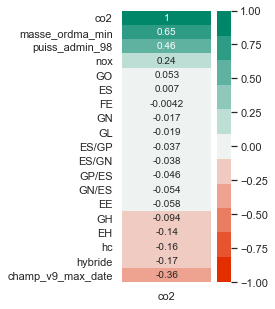

In [325]:
fig, ax = plt.subplots(figsize=(2, 5))
co2_corr_list = data.corr()[['co2']].sort_values(by='co2', ascending=False)

sns.heatmap(co2_corr_list,
            annot=True,
            cmap=cmap,
            center=0,
            vmin=-1,
            vmax=1,
            ax=ax)

Based on a 30% threshold, one would keep only:
- masse_ordma_min
- puiss_admin_98
- champ_v9_max_date

Additionally, for a 20% threshold:
- champ_v9_max_date
- nox

Let's keep it this way for now, and see how the prediction goes.

## Prepare input even more

### Normalization

champ_v9_max_date

In [326]:
# Normalizing dates will help some models
dates_normalized = (dates_extract - dates_extract.mean())/dates_extract.std()

In [327]:
data['champ_v9_max_date'] = dates_normalized

## Prediction

target: co2

test data: Audi, Citroen, Kia, Subaru, Smart, Mini

train data: remaining brands

### Split dataset for training and testing

In [328]:
test_data_brands = ["AUDI", "CITROEN", "KIA", "SUBARU", "SMART", "MINI"]

In [329]:
ma_test = data['lib_mrq'].isin(test_data_brands)

In [330]:
data_test = data[ma_test]
data_train = data[~ma_test]

In [331]:
# Manually set the features
features = [
    'hybride',
    'puiss_admin_98',
    'hc',
    'nox',
    'masse_ordma_min',
    'champ_v9_max_date',
    'EE',
    'EH',
    'ES',
    'ES/GN',
    'ES/GP',
    'FE',
    'GH',
    'GL',
    'GN',
    'GN/ES',
    'GO',
    'GP/ES'
]

target = 'co2'

In [332]:
X_train = data_train[features]
X_test = data_test[features]

Y_train = data_train[target]
Y_test = data_test[target]

### Train and test model

#### Benchmark: Linear model

In [333]:
from sklearn.linear_model import LinearRegression

In [334]:
reg = LinearRegression().fit(X_train, Y_train)

In [335]:
print("Train:", reg.score(X_train, Y_train))
print("Test:", reg.score(X_test, Y_test))

Train: 0.6229750140617236
Test: 0.5716382065026249


This is not good, but not so bad for a model that cannot handle non-linearities.

#### Tree

In [336]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [337]:
reg = DecisionTreeRegressor(random_state=1000)
cross_val_score(reg, X_train, Y_train, cv=10)

array([ 0.69813682, -0.53100404, -0.04401349,  0.94954201,  0.93758986,
        0.8166948 ,  0.86819417,  0.88404129,  0.63227062,  0.74178037])

In [338]:
reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1000)

In [339]:
print("Train:", reg.score(X_train, Y_train))
print("Test:", reg.score(X_test, Y_test))

Train: 0.9775032949443816
Test: 0.7147332963535202


The model is way better, but overfits a little:
- it has 97% on train set while 71% on test set

This is due to the very nature of Trees. To circumvent this issue, the random forest use, ..., randomization.

#### Random forests

In [340]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [341]:
reg = RandomForestRegressor(max_depth=20, random_state=0)
reg.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [342]:
print("Train:", reg.score(X_train, Y_train))
print("Test:", reg.score(X_test, Y_test))

Train: 0.9762032985935729
Test: 0.8117029483354944


The ensemble method yields +10% accuracy.

This is satisfying enough for this project!

# How To ?

## Impute NA based on other columns values
Vectorial operations are the most efficient

- apply : fonctions, lambda
- fillna : categories, liste/series

In [343]:
df = pd.DataFrame()

In [344]:
df.fillna

<bound method DataFrame.fillna of Empty DataFrame
Columns: []
Index: []>

In [345]:
help(df.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> 'Optional[DataFrame]' method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index', 1 or 'columns'}
        Axis along which to fill missing 

In [346]:
mean = data['hc'].mean()
dic_imputation = {'hc': mean, 'nox': mean}
data.fillna(value=dic_imputation)

,lib_mrq,hybride,puiss_admin_98,co2,hc,nox,masse_ordma_min,champ_v9_max_date,EE,EH,ES,ES/GN,ES/GP,FE,GH,GL,GN,GN/ES,GO,GP/ES
0,ALFA-ROMEO,0,12,182.0,0.052,0.032,1505,-0.936771,0,0,1,0,0,0,0,0,0,0,0,0
1,ALFA-ROMEO,0,12,186.0,0.052,0.032,1555,-0.936771,0,0,1,0,0,0,0,0,0,0,0,0
2,ALFA-ROMEO,0,7,134.0,0.026,0.149,1565,-0.936771,0,0,0,0,0,0,0,0,0,0,1,0
3,ALFA-ROMEO,0,7,134.0,0.026,0.149,1565,-0.936771,0,0,0,0,0,0,0,0,0,0,1,0
4,ALFA-ROMEO,0,9,139.0,0.029,0.164,1565,-0.936771,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,VOLVO,0,10,129.0,0.017,0.048,1755,1.235616,0,0,0,0,0,0,0,0,0,0,1,0
55040,VOLVO,0,11,169.0,0.036,0.116,1799,0.801138,0,0,0,0,0,0,0,0,0,0,1,0
55041,VOLVO,0,13,169.0,0.036,0.116,1798,0.801138,0,0,0,0,0,0,0,0,0,0,1,0
55042,VOLVO,0,12,139.0,0.038,0.106,1788,0.801138,0,0,0,0,0,0,0,0,0,0,1,0


## Know how a function works

Est-ce que la méthode df.drop_dups() supprime exclusivement les vrais doublons ? c'est-à-dire est-ce que je ne risque pas d'en supprimer de faux et donc de perdre de la donnée ? 

- Research on internet, and go first find the definition (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
- You can also get the definition using Python directly
- Try yourself (you won't break stuffs)
- Find examples on blogs

In [347]:
a = c = b = 1

In [348]:
data.shape

(54886, 20)

In [349]:
# Same action, different appelations
data.drop_duplicates(inplace=True)
# dups = data.drop_duplicates()

In [350]:
data.shape

(5840, 20)

We see a difference, the question is now which have been deleted?

In [351]:
dups = data.duplicated(keep=False)
dups

0        False
1        False
2        False
4        False
6        False
         ...  
55039    False
55040    False
55041    False
55042    False
55043    False
Length: 5840, dtype: bool

In [352]:
data[dups]

,lib_mrq,hybride,puiss_admin_98,co2,hc,nox,masse_ordma_min,champ_v9_max_date,EE,EH,ES,ES/GN,ES/GP,FE,GH,GL,GN,GN/ES,GO,GP/ES


The answer is, it only drops exact duplicates (excepted for the index).

## Visualize properly

Using pandas_profiling? When?

- Use pandas profiling for a brief overview
- Go deeper manually if needed (it is, systematically) to display specific graphs

## Define whether the model predictions are good

=> benchmarks (may be from domain expertise - or from your own testing, or other known models performances)

## How much data for training, testing, or even cross-validating?

The more data the better. However, it is better to be confident on your model rather than having high performances without having any idea of the validity of these results on out of sample data. Thus you have to find a balance that depends of your problem.